In [4]:
import pandas as pd
import json

df = pd.read_csv("data/0721-month-analysis-data.csv")
analyzed_homepages = pd.read_json("homepage_data_analyzed_multiple.json", encoding='utf-8')


In [5]:
standard_columns = ['general_analysis', 'cross_group_thinking_ideas',
       'cross_group_thinking_score', 'unifying_language_ideas',
       'unifying_language_score', 'shared_initiatives_outreach_ideas',
       'shared_initiatives_outreach_score', 'importance_of_career_standing_ideas', 'importance_of_career_standing_score', 
       'hong_kong_emphasis_ideas', 'hong_kong_emphasis_score', 'highlighting_china_organization_ideas',
       'highlighting_china_organization_score', 'name']

standard_columns = [col for col in analyzed_homepages.columns if any(col.startswith(prefix) for prefix in standard_columns)]

analyzed_homepages = analyzed_homepages[standard_columns]

In [6]:
analyzed_homepages.columns

Index(['general_analysis_gemini-flash_0',
       'cross_group_thinking_ideas_analysis_gemini-flash_0',
       'cross_group_thinking_score_gemini-flash_0',
       'unifying_language_ideas_analysis_gemini-flash_0',
       'unifying_language_score_gemini-flash_0',
       'shared_initiatives_outreach_ideas_analysis_gemini-flash_0',
       'shared_initiatives_outreach_score_gemini-flash_0',
       'importance_of_career_standing_ideas_analysis_gemini-flash_0',
       'importance_of_career_standing_score_gemini-flash_0',
       'hong_kong_emphasis_ideas_analysis_gemini-flash_0',
       ...
       'unifying_language_score_gemini-flash_19',
       'shared_initiatives_outreach_ideas_analysis_gemini-flash_19',
       'shared_initiatives_outreach_score_gemini-flash_19',
       'importance_of_career_standing_ideas_analysis_gemini-flash_19',
       'importance_of_career_standing_score_gemini-flash_19',
       'hong_kong_emphasis_ideas_analysis_gemini-flash_19',
       'hong_kong_emphasis_score_gemin

In [7]:
score_prefixes = ['cross_group_thinking', 'unifying_language', 'shared_initiatives_outreach', 'importance_of_career_standing', 'hong_kong_emphasis', 'highlighting_china_organization']

for prefix in score_prefixes:
    score_columns = [col for col in analyzed_homepages.columns if col.startswith(prefix + '_score')]
    for column in score_columns:
        analyzed_homepages[column] = pd.to_numeric(analyzed_homepages[column], errors='coerce').fillna(0).astype(int)

hk_columns = [col for col in analyzed_homepages.columns if col.startswith('hong_kong_emphasis_score')]
for col in hk_columns:
    analyzed_homepages["inverse_" + col] = pd.to_numeric(analyzed_homepages[col], errors='coerce').fillna(0).astype(int)

/var/folders/rw/s7c9z30x7fj_2gcngv0yhv6w0000gn/T/ipykernel_10110/2763243756.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  analyzed_homepages["inverse_" + col] = pd.to_numeric(analyzed_homepages[col], errors='coerce').fillna(0).astype(int)
/var/folders/rw/s7c9z30x7fj_2gcngv0yhv6w0000gn/T/ipykernel_10110/2763243756.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  analyzed_homepages["inverse_" + col] = pd.to_numeric(analyzed_homepages[col], errors='coerce').fillna(0).astype(int)
/var/folders/rw/s7c9z30x7fj_2gcngv0yhv6w00

In [8]:
pooled_scores = {
    "total_reconciliation_score": [col for col in analyzed_homepages.columns if any(prefix in col for prefix in ['cross_group_thinking_score', 'unifying_language_score', 'shared_initiatives_outreach_score'])],
    "total_camouflage_score": [col for col in analyzed_homepages.columns if any(prefix in col for prefix in ['importance_of_career_standing_score', 'inverse_hong_kong_emphasis_score', 'highlighting_china_organization_score'])]
}



for key, columns_to_convert in pooled_scores.items():
    analyzed_homepages[key] = analyzed_homepages[columns_to_convert].mean(axis=1)

/var/folders/rw/s7c9z30x7fj_2gcngv0yhv6w0000gn/T/ipykernel_10110/105256012.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  analyzed_homepages[key] = analyzed_homepages[columns_to_convert].mean(axis=1)
/var/folders/rw/s7c9z30x7fj_2gcngv0yhv6w0000gn/T/ipykernel_10110/105256012.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  analyzed_homepages[key] = analyzed_homepages[columns_to_convert].mean(axis=1)


In [9]:
merged_df = pd.merge(df, analyzed_homepages, left_on='Researcher Cleaned Name', right_on='name', how='left')
# merged_df.fillna(0, inplace=True)
merged_df.drop(columns=['name'], inplace=True)

print(merged_df['Pre-2014 Region'].value_counts())

merged_df.to_csv("data/0721-month-analysis-data-merged-6.csv", index=False)

Pre-2014 Region
Hong Kong    21848
Singapore    15125
Name: count, dtype: int64


In [10]:
merged_df.columns

Index(['Researcher Cleaned Name', 'year', 'month', 'num_sg_mean',
       'num_sg_error', 'num_hk_mean', 'num_hk_error', 'num_ml_mean',
       'num_ml_error', 'num_other_mean',
       ...
       'inverse_hong_kong_emphasis_score_gemini-flash_12',
       'inverse_hong_kong_emphasis_score_gemini-flash_13',
       'inverse_hong_kong_emphasis_score_gemini-flash_14',
       'inverse_hong_kong_emphasis_score_gemini-flash_15',
       'inverse_hong_kong_emphasis_score_gemini-flash_16',
       'inverse_hong_kong_emphasis_score_gemini-flash_17',
       'inverse_hong_kong_emphasis_score_gemini-flash_18',
       'inverse_hong_kong_emphasis_score_gemini-flash_19',
       'total_reconciliation_score', 'total_camouflage_score'],
      dtype='object', length=327)

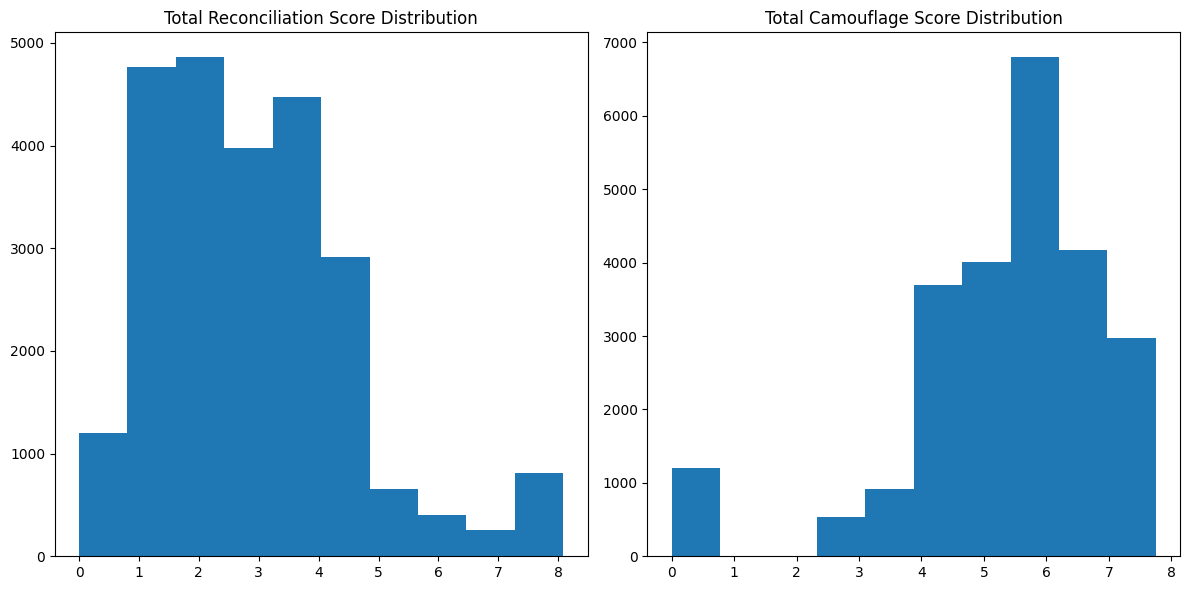

In [11]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(merged_df['total_reconciliation_score'])
axs[0].set_title("Total Reconciliation Score Distribution")

axs[1].hist(merged_df['total_camouflage_score'])
axs[1].set_title("Total Camouflage Score Distribution")

plt.tight_layout()
plt.show()